In [1]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import random

In [2]:
def load_dataset(filename):
    """
    函数说明：加载数据

    Parameters:
        None

    Returns:
        dataMat - 数据列表
        labelMat - 标签列表
    """
    # 创建数据列表
    dataX = []
    # 创建标签列表
    dataY = []
    # 打开文件
    with open(filename, 'r') as fr:
        lines = fr.readlines()
    # 逐行读取
    for line in lines:
        # 去掉每行两边的空白字符，并以空格分隔每行数据元素
        lineArr = line.strip().split()
        # 添加数据
        dataX.append([1.0, float(lineArr[0]), float(lineArr[1])])
        # 添加标签
        dataY.append(int(lineArr[2]))
    # 返回
    return dataX, dataY

In [3]:
dataX, dataY = load_dataset('testSet.txt')

In [4]:
def sigmoid(inX):
    """
    函数说明：sigmoid函数

    Parameters:
        inX - 数据

    Returns:
        sigmoid函数
    """
    return 1.0 / (1 + np.exp(-inX))

In [5]:
def grad_descent(dataX, dataY):
    """
    函数说明：批量梯度下降法

    Parameters:
        dataX - 数据集
        dataY - 数据标签

    Returns:
        weights - 求得的权重数组（最优参数）
        weights_array - 每次更新的回归系数
    """
    # 转换成numpy的mat(矩阵)
    dataX = np.mat(dataX)
    # 转换成numpy的mat(矩阵)并进行转置，".T"或写成".transpose()
    dataY = np.mat(dataY).T
    # 返回dataMatrix的大小，m为行数，n为列数
    m, n = np.shape(dataX)
    # 移动步长，也就是学习效率，控制更新的幅度
    alpha = 0.01
    weights = np.ones((n, 1))
    weights_array = np.array([])
    maxCycles = 500
    for k in range(maxCycles):
        # 梯度下降公式
        h = sigmoid(dataX * weights)
        error = h - dataY
        weights = weights - alpha * dataX.T * error 
        # numpy.append(arr, values, axis=None):表示向数组arr中添加values形成一个新的数组，做为返回值。
        # 当axis无定义时，是横向加成，返回总是为一维数组
        weights_array = np.append(weights_array, weights)
    weights_array = weights_array.reshape(maxCycles, n)
    return weights, weights_array

In [6]:
# 训练权重
weights1, weights_array1 = grad_descent(dataX, dataY)
print(weights1)

[[12.78439308]
 [ 1.11820761]
 [-1.7408268 ]]


In [7]:
def stoc_grad_descent(dataX, dataY, num_iter=50):
    """
    函数说明：改进的随机梯度下降法
                alpha每次迭代都会调整，随着迭代次数不断减小；
                随机选取样本；
                增加了一个参数-迭代次数。

    Parameters:
        dataMatrix - 数据数组
        classLabels - 数据标签
        numIter - 迭代次数

    Returns:
        weights - 求得的回归系数数组（最优参数）
        weights_array - 每次更新的回归系数
    """
    # 返回dataMatrix的大小，m为行数，n为列数
    m, n = np.shape(dataX)
    # 参数初始化
    weights = np.ones(n)
    weights_array = np.array([])
    for j in range(num_iter):
        # 创建一个索引列表
        data_index = list(range(m))
        for i in range(m):
            # 每次都降低alpha的大小
            alpha = 4/(1.0+j+i)+0.01
            # 随机选择样本。random.uniform(min,max)随机生成一个min/max之间的实数
            rand_index = int(random.uniform(0, len(data_index)))
            # 随机选择一个样本计算h
            h = sigmoid(sum(dataX[rand_index] * weights))
            # 计算误差
            error = h - dataY[rand_index]
            # 更新回归系数
            weights = weights - alpha * error * dataX[rand_index]
            # 添加返回系数到数组中当axis为0时，数组是加在下面（列数要相同）
            weights_array = np.append(weights_array, weights, axis=0)
            # 删除已使用的样本
            del(data_index[rand_index])
    # 改变维度
    weights_array = weights_array.reshape(num_iter * m, n)
    # 返回
    return weights, weights_array


In [8]:
# 新方法训练权重
weights2, weights_array2 = stoc_grad_descent(np.array(dataX), dataY)

In [9]:
# 绘制数据集中的y和x的散点图

def plotBestFit(weights, dataX, dataY):
    """
    函数说明：绘制数据集

    Parameters:
        weights - 权重参数数组

    Returns:
        None
    """
    # 转换成numpy的array数组
    dataX = np.array(dataX)
    # 数据个数
    # 例如建立一个4*2的矩阵c，c.shape[1]为第一维的长度2， c.shape[0]为第二维的长度4
    n = np.shape(dataX)[0]
    # 正样本
    xcord1 = []
    ycord1 = []
    # 负样本
    xcord2 = []
    ycord2 = []
    # 根据数据集标签进行分类
    for i in range(n):
        if int(dataY[i]) == 1:
            # 1为正样本
            xcord1.append(dataX[i, 1])
            ycord1.append(dataX[i, 2])
        else:
            # 0为负样本
            xcord2.append(dataX[i, 1])
            ycord2.append(dataX[i, 2])
    # 新建图框
    fig = plt.figure()
    # 添加subplot
    ax = fig.add_subplot(111)
    # 绘制正样本 s：指定散点的大小。c：指定散点的颜色。alpha：指定散点的透明度。marker：指定散点的图形样式。's'（正方形标记）
    ax.scatter(xcord1, ycord1, s=20, c='red', marker='s', alpha=.5)
    # 绘制负样本
    ax.scatter(xcord2, ycord2, s=20, c='green', alpha=.5)
    # x轴坐标
    x = np.arange(-3.0, 3.0, 0.1)
    # w0*x0 + w1*x1 * w2*x2 = 0
    # x0 = 1, x1 = x, x2 = y
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y.T)
    # 绘制title
    plt.title('BestFit')
    # 绘制label
    plt.xlabel('x1')
    plt.ylabel('y2')
    # 显示
    plt.show()

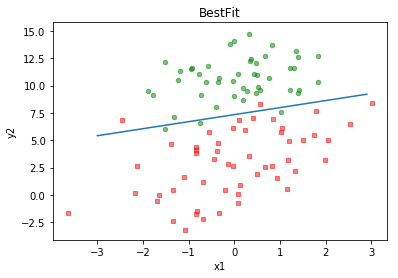

In [10]:
# 绘制数据集中的y和x的散点图
plotBestFit(weights1, dataX, dataY)

In [13]:
def plotWeights(weights_array1, weights_array2):
    """
    函数说明：绘制回归系数与迭代次数的关系

    Parameters:
        weights_array1 - 回归系数数组1
        weights_array2 - 回归系数数组2

    Returns:
        None
    """
    # 设置汉字格式为14号简体字
    font = FontProperties(fname=r"SIMFANG.TTF", size=14)
    # 将fig画布分隔成1行1列，不共享x轴和y轴，fig画布的大小为（20, 10）
    # 当nrows=3，ncols=2时，代表fig画布被分为6个区域，axs[0][0]代表第一行第一个区域
    fig, axs = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=False, figsize=(20, 10))
    # x1坐标轴的范围
    x1 = np.arange(0, len(weights_array1), 1)
    # 绘制w0与迭代次数的关系
    axs[0][0].plot(x1, weights_array1[:, 0])
    axs0_title_text = axs[0][0].set_title(u'批量梯度下降算法，回归系数与迭代次数关系', FontProperties=font)
    axs0_ylabel_text = axs[0][0].set_ylabel(u'w0', FontProperties=font)
    plt.setp(axs0_title_text, size=20, weight='bold', color='black')
    plt.setp(axs0_ylabel_text, size=20, weight='bold', color='black')
    # 绘制w1与迭代次数的关系
    axs[1][0].plot(x1, weights_array1[:, 1])
    axs1_ylabel_text = axs[1][0].set_ylabel(u'w1', FontProperties=font)
    plt.setp(axs1_ylabel_text, size=20, weight='bold', color='black')
    # 绘制w2与迭代次数的关系
    axs[2][0].plot(x1, weights_array1[:, 2])
    axs2_title_text = axs[2][0].set_title(u'迭代次数', FontProperties=font)
    axs2_ylabel_text = axs[2][0].set_ylabel(u'w2', FontProperties=font)
    plt.setp(axs2_title_text, size=20, weight='bold', color='black')
    plt.setp(axs2_ylabel_text, size=20, weight='bold', color='black')
    
    # x2坐标轴的范围
    x2 = np.arange(0, len(weights_array2), 1)
    # 绘制w0与迭代次数的关系
    axs[0][1].plot(x2, weights_array2[:, 0])
    axs0_title_text = axs[0][1].set_title(u'随机梯度下降算法，回归系数与迭代次数关系', FontProperties=font)
    axs0_ylabel_text = axs[0][1].set_ylabel(u'w0', FontProperties=font)
    plt.setp(axs0_title_text, size=20, weight='bold', color='black')
    plt.setp(axs0_ylabel_text, size=20, weight='bold', color='black')
    # 绘制w1与迭代次数的关系
    axs[1][1].plot(x2, weights_array2[:, 1])
    axs1_ylabel_text = axs[1][1].set_ylabel(u'w1', FontProperties=font)
    plt.setp(axs1_ylabel_text, size=20, weight='bold', color='black')
    # 绘制w2与迭代次数的关系
    axs[2][1].plot(x2, weights_array2[:, 2])
    axs2_title_text = axs[2][1].set_title(u'迭代次数', FontProperties=font)
    axs2_ylabel_text = axs[2][1].set_ylabel(u'w2', FontProperties=font)
    plt.setp(axs2_title_text, size=20, weight='bold', color='black')
    plt.setp(axs2_ylabel_text, size=20, weight='bold', color='black')
    
    plt.show()

In [14]:
# print(gradAscent(dataMat, labelMat))
plotWeights(weights_array1, weights_array2)

FileNotFoundError: [Errno 2] No such file or directory: 'SIMFANG.TTF'

<Figure size 1440x720 with 6 Axes>